<h1>Movie Lens Dataset Mini Project</h1>

<p>About the Data:</p>
<p>This data is collected by the GroupLens Research from the Movie Lens Website, This MovieLens Data set has almost 20 million ratings and 465,000 tag applications applied to 27,000 movies by 138,000 users</hp>

<ul>
    <li>To download the MovieLens DBS: <a href = 'https://grouplens.org/datasets/movielens'> https://grouplens.org/datasets/movielens </a>   </li>
</ul>

## What Research Question does the project answers ?

<p> The research question that this project is trying to find is that does the Science Fiction Movies tend to be rated  more highly than other movie genres? </p>

In [99]:
# Importing the different Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [100]:
#Import the data set 
os.chdir(r'C:\Users\Ahsan\Desktop\Course\Python for Data Science Course Materials\Week 04\Week-4-Pandas')

movies = pd.read_csv('./movielens/movies.csv', sep=',')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [101]:
tags = pd.read_csv('./movielens/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [102]:
ratings = pd.read_csv('./movielens/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [103]:
ratings[['rating','timestamp']].describe()

,rating,timestamp
count,2.000026e+07,2.000026e+07
mean,3.525529e+00,1.100918e+09
std,1.051989e+00,1.621694e+08
min,5.000000e-01,7.896520e+08
25%,3.000000e+00,9.667977e+08
50%,3.500000e+00,1.103556e+09
75%,4.000000e+00,1.225642e+09
max,5.000000e+00,1.427784e+09


#### Now we have loaded a explore a the data, our next question will the average ratings of the SciFi Movie and the average rating of all other movies

In [104]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [105]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [106]:
finaldf = pd.merge(movies,ratings, on = 'movieId')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### Now that we have merged the movies with the ratings, we will now split the data out into movies with SciFi Genres and movies not having SciFi Genres

In [107]:
filter = finaldf['genres'].str.contains('Sci-Fi')
ScifiMovies = finaldf[filter]


In [108]:
OtherMovies = finaldf[~filter]


In [109]:
#Checking whether our splitting is Accurate or not
len(finaldf) == len(ScifiMovies) + len(OtherMovies)

True

In [110]:
print('The mean Rating of the ScifiMovies: ', ScifiMovies['rating'].mean() )
print('The median Rating of the ScifiMovies:', ScifiMovies['rating'].median())

The mean Rating of the ScifiMovies:  3.4367726714455005
The median Rating of the ScifiMovies: 3.5


In [111]:
print('The mean Rating of all other movies:', OtherMovies['rating'].mean() )
print('The median Rating of all other movies:', OtherMovies['rating'].median() )

The mean Rating of all other movies: 3.5421215347877006
The median Rating of all other movies: 4.0


#### As we can see from the above statistics that the SciFi have low mean and median as compared to all the other movies,now will will further explore the data set with the box plot

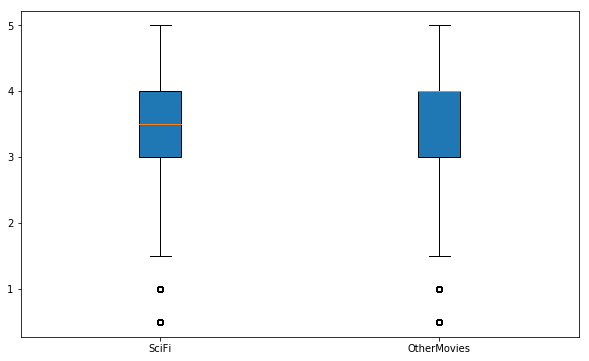

In [112]:
fig = plt.figure(1, figsize=(10,6))
ax = fig.add_subplot(111)
plt.boxplot([ScifiMovies['rating'].values,OtherMovies['rating'].values], patch_artist = True)

ax.set_xticklabels(['SciFi', 'OtherMovies'])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

fig.set_label('Box Plot for the SciFi Movies and Other Movies')

plt.show()

#### Now finally to end our conclusion we will analyze the ratings on a scater plot

In [113]:
ratingSci = ScifiMovies['rating'].values.tolist()

ratingOther = OtherMovies['rating'].values.tolist()

In [114]:
#Function that will basically calculate a frequenction distribution dictionary
def calculateRating(array):
    dictionary = {0.5: 0  , 
              1: 0    , 
              1.5: 0  ,
              2 : 0,
             2.5:0   , 
              3: 0    ,
              3.5:0   , 
              4:0     ,
              4.5 : 0,
              5:0}
    
    for i in range(len(array)):
        if (array[i] == 0.5):
            dictionary[0.5] += 1
        elif (array[i] == 1):
            dictionary[1] += 1
        elif (array[i] == 1.5 ):
            dictionary[1.5] += 1
        elif (array[i] == 2 ):
            dictionary[2] += 1
        elif (array[i] == 2.5 ):
            dictionary[2.5] += 1
        elif (array[i] == 3 ):
            dictionary[3] += 1
        elif (array[i] == 3.5 ):
            dictionary[3.5] += 1
        elif (array[i] == 4 ):
             dictionary[4] += 1
        elif (array[i] == 4.5 ):
            dictionary[4.5] += 1
        elif (array[i] == 5 ):
            dictionary[5] += 1
    return dictionary
            

In [115]:
ratingSciDict = calculateRating(ratingSci)


ratingOtherDict = calculateRating(ratingOther)

ratingSciDict

{0.5: 43361,
 1: 126590,
 1.5: 55329,
 2: 263952,
 2.5: 161438,
 3: 682970,
 3.5: 360912,
 4: 809259,
 4.5: 234465,
 5: 411865}

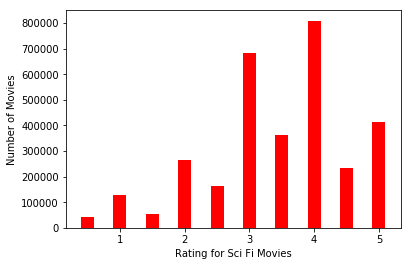

In [116]:
import matplotlib.pyplot as plt

ax1 = plt.subplot(111)
ax1.bar(list(ratingSciDict.keys()), ratingSciDict.values(), width=0.2, color='r', align='center')
plt.xlabel('Rating for Sci Fi Movies')
plt.ylabel('Number of Movies')
plt.show()

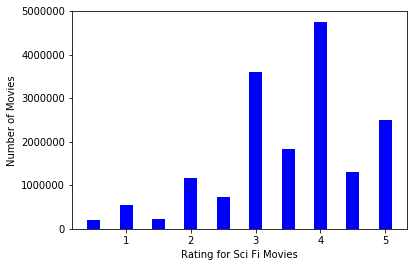

In [117]:
ax2 = plt.subplot(111)
ax2.bar(list(ratingOtherDict.keys()), ratingOtherDict.values(), width=0.2, color='b', align='center')
plt.xlabel('Rating for Sci Fi Movies')
plt.ylabel('Number of Movies')
plt.show()

#### From the above statistics we can say that their is not a significant difference between the rating of the SciFi movies and all the other movies, although still there is a slight advantage to other movies in terms of ratings as compared to Sci Fi Movies            